In [1]:
import pandas as pd

The dataset was taken from here https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive

####   Well, let's see what data we have.

In [4]:
pre_df = pd.read_csv('Women Dresses Reviews Dataset .csv')
pre_df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


I haven't studied the tools for working with words yet, so let's leave them aside.

In [5]:
df = pre_df.drop(columns = ['title', 'review_text', 'alike_feedback_count'])
df.set_index('s.no', inplace = True)
df.head()

,age,division_name,department_name,class_name,clothing_id,rating,recommend_index
s.no,,,,,,,
0,40,General,Bottoms,Jeans,1028,5,1
1,62,General Petite,Tops,Blouses,850,5,1
2,47,General Petite,Bottoms,Skirts,993,1,0
3,45,General Petite,Bottoms,Pants,1068,5,1
4,37,Initmates,Intimate,Swim,24,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               23486 non-null  int64 
 1   division_name     23472 non-null  object
 2   department_name   23472 non-null  object
 3   class_name        23472 non-null  object
 4   clothing_id       23486 non-null  int64 
 5   rating            23486 non-null  int64 
 6   recommend_index   23486 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,clothing_id,rating,recommend_index
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,918.118709,4.196032,0.822362
std,12.279544,203.298980,1.110031,0.382216
min,18.000000,0.000000,1.000000,0.000000
25%,34.000000,861.000000,4.000000,1.000000
50%,41.000000,936.000000,5.000000,1.000000
75%,52.000000,1078.000000,5.000000,1.000000
max,99.000000,1205.000000,5.000000,1.000000


And here are the first results: the median age of buyers is 41 years, the median rating is 5.0

Now let's look at the distribution of ages and rating.

In [8]:
from matplotlib import pyplot as plt

(array([1646., 4421., 6575., 4516., 3229., 2215.,  691.,  112.,   68.,
          13.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

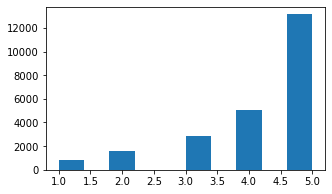

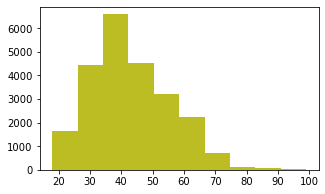

In [9]:
plt.figure(figsize=(5,3))
plt.hist(df['rating'], color = 'tab:blue')
plt.figure(figsize=(5,3))
plt.hist(df['age'], color = 'tab:olive')

We see that the median of ratings is shifted to the right tail, and the distribution of buyers by age is similar to normal. Let's make sure of this.

In [113]:
import scipy.stats as stats

In [115]:
w, pvalue = stats.shapiro(df['age'])
w, pvalue

(0.9755902290344238, 0.0)

But... No, p-value tells us that the distribution not looks like normal, we have to reject H0.

 Okay, maybe the rating depends on the age? At first let's look at the distribution of ratings by age.

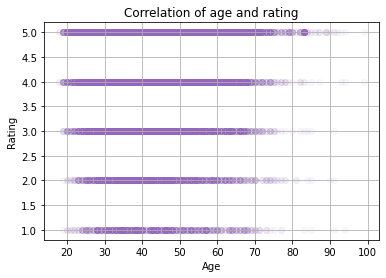

In [10]:
plt.scatter(df['age'], df['rating'], color = 'tab:purple', alpha = 0.05)
plt.grid()
plt.title('Correlation of age and rating')
plt.xlabel('Age')
plt.ylabel('Rating')
# plt.ylim(0, 200)
plt.show()

The distribution of grades looks like middle-aged people (30-50) give more bad grades than people of other ages. But we remember that in our sample these people (30-50 years old) are the most. Probably, the number of bad grades is influenced not by age, but by the number of people in the age group?

Let's break the buyers into age groups and see how they put ratings. I chose the quartile division. As we learned earlier, the minimum age in the sample is 18 years, the second quartile of 25% is 34 years, the third (median) 50% are 41 years old and the fourth quartile of 75% is 52 years old, and the maximum age is 99 years.

In [11]:
def age_group (x):
    if x <= 34:
        return '18-34'
    elif x <= 41:
        return '35-41'
    elif x <= 52:
        return '42-52'
    else:
        return '53-99'

df['age_group'] = df['age'].apply(age_group)    

In [12]:
df.head()

,age,division_name,department_name,class_name,clothing_id,rating,recommend_index,age_group
s.no,,,,,,,,
0,40,General,Bottoms,Jeans,1028,5,1,35-41
1,62,General Petite,Tops,Blouses,850,5,1,53-99
2,47,General Petite,Bottoms,Skirts,993,1,0,42-52
3,45,General Petite,Bottoms,Pants,1068,5,1,42-52
4,37,Initmates,Intimate,Swim,24,5,1,35-41


So, we have four age groups: 18-34, 34-41, 42-52, 53-99. Let's see what grades they give.

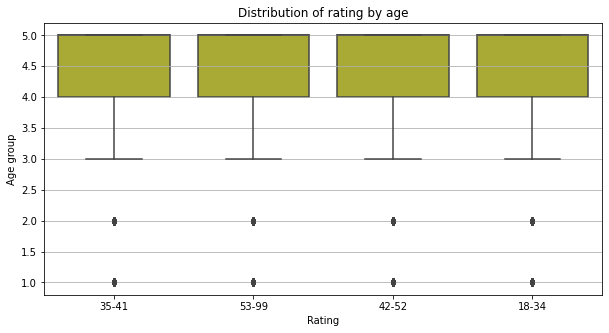

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.title('Distribution of rating by age')
plt.grid()
sns.boxplot(x='age_group',
            y='rating',
            data=df, 
            color='tab:olive')
plt.ylabel('Age group')
plt.xlabel('Rating')
plt.show()

Perhaps nothing unusual, in each age group, the majority gives good grades.

But if you look deeper....

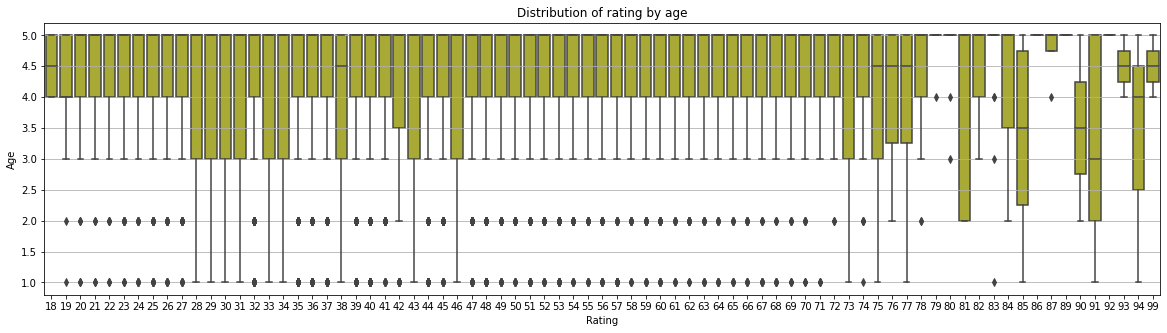

In [118]:
plt.figure(figsize=(20, 5))
plt.title('Distribution of rating by age')
plt.grid()
sns.boxplot(x='age',
            y='rating',
            data=df, 
            color='tab:olive')
plt.ylabel('Age')
plt.xlabel('Rating')
plt.show()

Oh, people 28-46 and over 73 seem to be very picky.

In [134]:
import numpy as np
r1 = df['age'].dropna()
r2 = df['rating'].dropna()
np.cov(r1, r2)

array([[150.78719141,   0.36571873],
       [  0.36571873,   1.2321682 ]])

And yes, correlation betwen age and ratind exists, it's average.

Now we can look at purchases, not buyers.

In [14]:
class_group = df.groupby('class_name')['clothing_id'].count().reset_index().sort_values(by = 'clothing_id', ascending = False)
class_group

,class_name,clothing_id
3,Dresses,6319
8,Knits,4843
0,Blouses,3097
17,Sweaters,1428
13,Pants,1388
7,Jeans,1147
4,Fine gauge,1100
15,Skirts,945
6,Jackets,704
11,Lounge,691


Dresses are very popular. If you don't like the numbers, purchases can be compared on a histogram.

(array([4244., 2333., 1778., 5943., 7023., 1008.,  482.,  393.,  265.,
          17.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

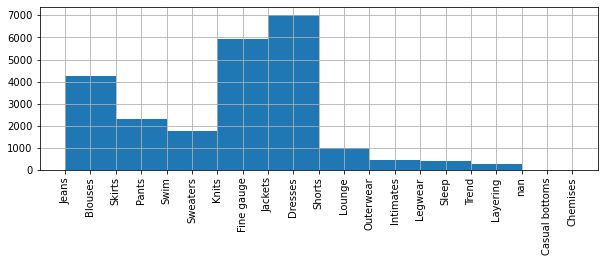

In [135]:
df['class_name'] = df['class_name'].astype(str)
plt.figure(figsize=(10,3))
plt.grid()
plt.xticks(rotation='vertical')
plt.hist(df['class_name'], color = 'tab:blue')

And how much do customers like them?

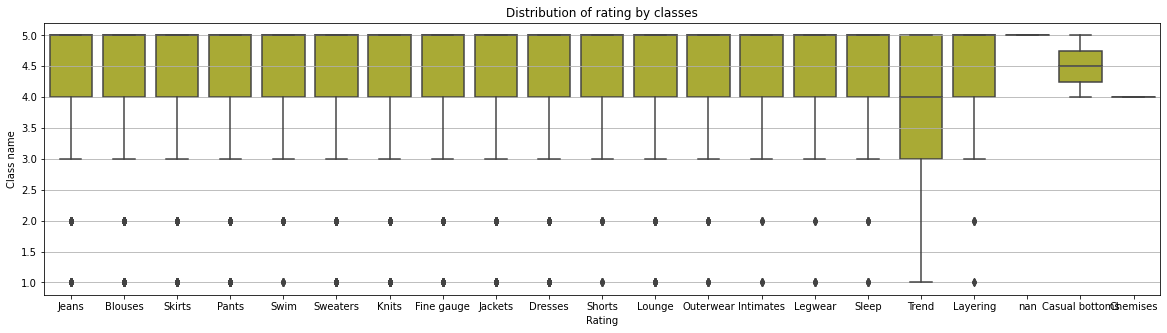

In [16]:
plt.figure(figsize=(20, 5))
plt.title('Distribution of rating by classes')
plt.grid()
sns.boxplot(x='class_name',
            y='rating',
            data=df, 
            color='tab:olive')
plt.ylabel('Class name')
plt.xlabel('Rating')
plt.show()

It seems that customers like all product groups equally. But something is wrong with Trend. Products from this group are bought a little and put a lot of bad ratings.

We have another indicator of the quality of the purchase - recommend_index. But we can't work with 'index' in here, we'll rename it.

In [19]:
df.columns = ['age', 'division_name', 'department_name', 'class_name', 'clothing_id', 'rating', 'recommendation', 'age_group']
df.head()

,age,division_name,department_name,class_name,clothing_id,rating,recommendation,age_group
s.no,,,,,,,,
0,40,General,Bottoms,Jeans,1028,5,1,35-41
1,62,General Petite,Tops,Blouses,850,5,1,53-99
2,47,General Petite,Bottoms,Skirts,993,1,0,42-52
3,45,General Petite,Bottoms,Pants,1068,5,1,42-52
4,37,Initmates,Intimate,Swim,24,5,1,35-41


We can assume that a lot of high ratings means a lot of recommendations. But let's make sure.

In [21]:
recommend_group = df.groupby('recommendation')['clothing_id'].count().reset_index()
recommend_group

,recommendation,clothing_id
0,0,4172
1,1,19314


Yes, most buyers recommend the purchase to others. Now we can look at the recommendations inside the groups in detail.

In [33]:
recommend_group_ratio = df.groupby('class_name')['recommendation'].count().reset_index().sort_values(by = 'recommendation', ascending = False)
recommend_group_ratio_r1 = df.groupby('class_name')['recommendation'].sum().reset_index()
recommend_ratio = recommend_group_ratio.merge(recommend_group_ratio_r1, on = 'class_name')
recommend_ratio.columns = ['class_name', 'count_all', 'count_r1']
recommend_ratio['count_r0'] = recommend_ratio['count_all'] - recommend_ratio['count_r1']
recommend_ratio['perc_r1'] = round(recommend_ratio['count_r1']*100/recommend_ratio['count_all'], 1)
recommend_ratio

,class_name,count_all,count_r1,count_r0,perc_r1
0,Dresses,6319,5107,1212,80.8
1,Knits,4843,3960,883,81.8
2,Blouses,3097,2509,588,81.0
3,Sweaters,1428,1143,285,80.0
4,Pants,1388,1156,232,83.3
5,Jeans,1147,1011,136,88.1
6,Fine gauge,1100,921,179,83.7
7,Skirts,945,799,146,84.6
8,Jackets,704,595,109,84.5
9,Lounge,691,594,97,86.0


In [133]:
recommend_ratio.describe()

,count_all,count_r1,count_r0,perc_r1
count,21.000000,21.000000,21.000000,21.000000
mean,1118.380952,919.714286,198.666667,85.695238
std,1666.375692,1350.471775,316.852384,6.773144
min,1.000000,1.000000,0.000000,73.900000
25%,154.000000,132.000000,23.000000,81.700000
50%,350.000000,282.000000,68.000000,84.500000
75%,1147.000000,1011.000000,179.000000,86.100000
max,6319.000000,5107.000000,1212.000000,100.000000


We see that on average about 85% of buyers recommend buying. And we expect to see that Trend are out of the general.

We can display ratio of recommendations and non-recommendations in classes on a histogram.

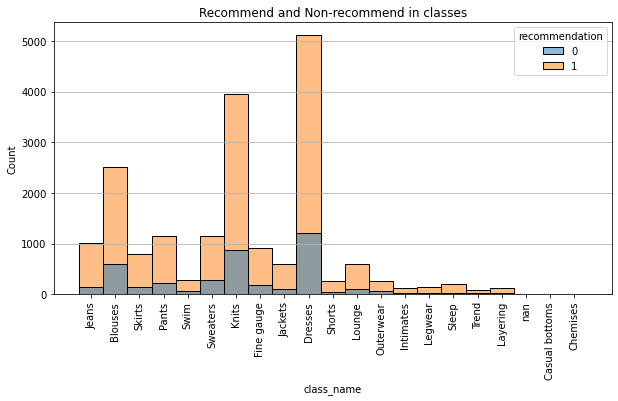

In [72]:
plt.figure(figsize=(10,5))
plt.title('Recommend and Non-recommend in classes')
plot = sns.histplot(data=df, x="class_name", hue="recommendation")
plot.tick_params(axis='x', rotation=90)
plt.grid(axis = 'y')
plt.show()

On scatter plot we can display Correlation of Count of purchase and percentage of recommend in classes.

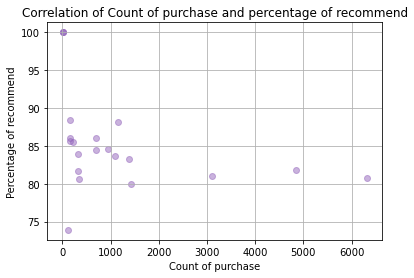

In [73]:
plt.scatter(recommend_ratio['count_all'], recommend_ratio['perc_r1'], color = 'tab:purple', alpha = 0.5)
plt.grid()
plt.title('Correlation of Count of purchase and percentage of recommend')
plt.xlabel('Count of purchase')
plt.ylabel('Percentage of recommend')
plt.show()

As we can see, the more purchases there are in groups, the more the percentage of recommendations becomes the same.

Let's look at the sales of the divisions.

In [137]:
df['division_name'].value_counts().reset_index()

,index,division_name
0,General,13850
1,General Petite,8120
2,Initmates,1502


And their ratings.

In [78]:
df.groupby('division_name')['rating'].mean().reset_index().sort_values(by = 'rating', ascending = False)

,division_name,rating
2,Initmates,4.286285
1,General Petite,4.211084
0,General,4.176606


Now let's look at the sales of the departments.

In [141]:
df['department_name'].value_counts().reset_index()

,index,department_name
0,Tops,10468
1,Dresses,6319
2,Bottoms,3799
3,Intimate,1735
4,Jackets,1032
5,Trend,119


In [79]:
df.groupby('department_name')['rating'].mean().reset_index().sort_values(by = 'rating', ascending = False)

,department_name,rating
0,Bottoms,4.288760
2,Intimate,4.280115
3,Jackets,4.264535
4,Tops,4.172239
1,Dresses,4.150815
5,Trend,3.815126


Also We can  get a list of clothing_id with different ratings and popularity.

In [104]:
df.groupby('rating')['clothing_id'].apply(list)

rating
1    [993, 877, 870, 1094, 1077, 878, 1094, 1054, 8...
2    [1020, 884, 850, 820, 995, 1022, 877, 860, 865...
3    [1086, 939, 835, 1078, 879, 838, 1116, 930, 86...
4    [933, 873, 1078, 1053, 1058, 939, 1094, 831, 8...
5    [1028, 850, 1068, 24, 937, 868, 900, 873, 872,...
Name: clothing_id, dtype: object

In [142]:
df['clothing_id'].value_counts().reset_index()

,index,clothing_id
0,1078,1024
1,862,806
2,1094,756
3,1081,582
4,872,545
...,...,...
1201,648,1
1202,1029,1
1203,657,1
1204,354,1


Let's see how many clothes are bought by different age groups.

In [86]:
df.groupby('age_group')['clothing_id'].count().reset_index().sort_values(by = 'clothing_id', ascending = False)

,age_group,clothing_id
0,18-34,6067
2,42-52,6002
1,35-41,5924
3,53-99,5493


In [95]:
df_gr = df.groupby(['age_group', 'class_name'])['clothing_id'].count().reset_index().sort_values(by = 'clothing_id', ascending = False)
df_gr

,age_group,class_name,clothing_id
2,18-34,Dresses,1797
22,35-41,Dresses,1668
41,42-52,Dresses,1570
60,53-99,Dresses,1284
46,42-52,Knits,1241
...,...,...,...
39,35-41,nan,4
19,18-34,nan,4
1,18-34,Casual bottoms,2
21,35-41,Chemises,1


It seems that people aged 18-34 buy the most, and they prefer dresses.

In [92]:
df.groupby(by='age_group', as_index=False).agg({'class_name': pd.Series.nunique, 'clothing_id': pd.Series.nunique })

,age_group,class_name,clothing_id
0,18-34,20,732
1,35-41,20,656
2,42-52,19,614
3,53-99,19,581


And despite the fact that most buyers are in the age groups of 34-41 and 42-52, the first group of 18-34 overtakes them in terms of the number of purchases.

The difference in purchases of different classes between buyers of different age groups can be displayed visually. Let's build a heatmap.

First, let's build a distribution table.

In [107]:
df_gr_pivot = df_gr.pivot(index='class_name', columns='age_group', values='clothing_id').fillna(0)
df_gr_pivot.head()

age_group,18-34,35-41,42-52,53-99
class_name,,,,
Blouses,719.0,718.0,842.0,818.0
Casual bottoms,2.0,0.0,0.0,0.0
Chemises,0.0,1.0,0.0,0.0
Dresses,1797.0,1668.0,1570.0,1284.0
Fine gauge,220.0,271.0,313.0,296.0


Now heatmap.

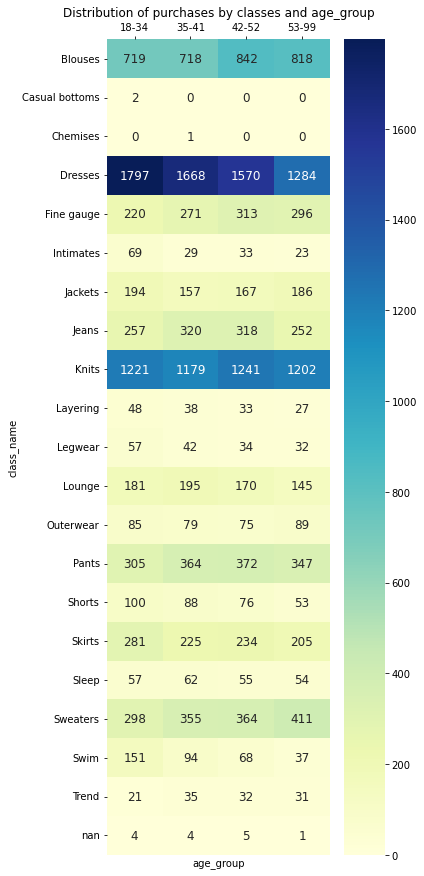

In [111]:
plt.figure(figsize=(5,15))
htmp = sns.heatmap(df_gr_pivot, 
            annot=True,
            cmap="YlGnBu",
            fmt='g',
            annot_kws={'size':12})             
plt.title("Distribution of purchases by classes and age_group")            
htmp.xaxis.set_ticks_position('top')
plt.show()

Now it is easy to see that most of the purchases are for Dresses, they are bought mainly by the age group 18-34. People over 42 prefer to buy Blouses, and Knits are bought by the 42-52 group a little more than the rest.

Let's now make the same graph for classes by rating.

Distriution at first.

In [128]:
df_rat = df.groupby(['rating', 'class_name'])['clothing_id'].count().reset_index().sort_values(by = 'clothing_id', ascending = False)
df_rat.head()

,rating,class_name,clothing_id
76,5,Dresses,3397
81,5,Knits,2589
74,5,Blouses,1686
57,4,Dresses,1395
62,4,Knits,1132


######### Then the pivot table.

In [129]:
df_rat_pivot = df_rat.pivot(index='class_name', columns='rating', values='clothing_id').fillna(0)
df_rat_pivot.head()

rating,1,2,3,4,5
class_name,,,,,
Blouses,119.0,229.0,394.0,669.0,1686.0
Casual bottoms,0.0,0.0,0.0,1.0,1.0
Chemises,0.0,0.0,0.0,1.0,0.0
Dresses,228.0,461.0,838.0,1395.0,3397.0
Fine gauge,30.0,75.0,119.0,230.0,646.0


And heatmap.

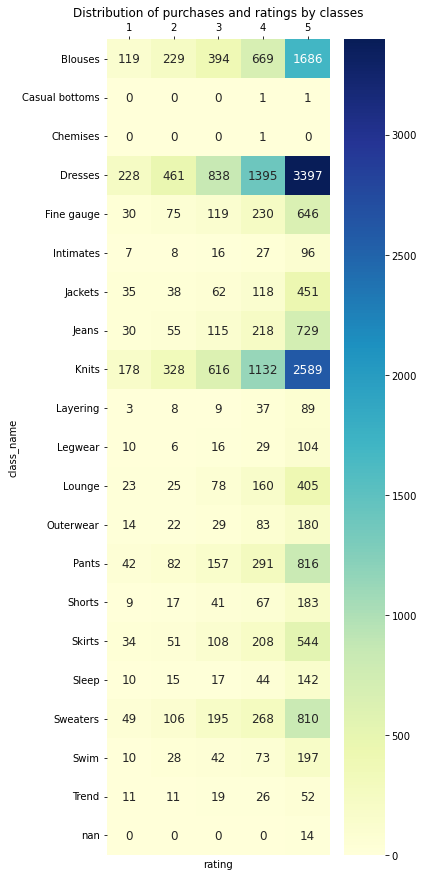

In [130]:
plt.figure(figsize=(5,15))
htmp1 = sns.heatmap(df_rat_pivot, 
            annot=True,
            cmap="YlGnBu",
            fmt='g',
            annot_kws={'size':12})             
plt.title("Distribution of purchases and ratings by classes")            
htmp1.xaxis.set_ticks_position('top')
plt.show()

Now we know where the best dresses, blouses and Knits are :-D

## This concludes my analysis of clothing sales from Amazon. Thank you for reading this! I hope you were interested! 